# Projeto de Análise de Sistemas por Quadripolos
**Disciplina**: Circuitos Elétricos 2 

**Aluna**: Gabriela Andrade

**Aluno**: Carolynne Ribeiro

**Aluno**: Daniel Loula

**Aluno**: Kildary Jonathan

**Aluno**: Mauro Sousa

**Professor**: Prof. Dr. Luiz Augusto Medeiros Martins Nobrega

**Data**: Pão


## Seção 1: Configuração Inicial
Nesta seção, são importadas as bibliotecas necessárias e definidas as constantes do sistema, como a frequência e a tensão do gerador.

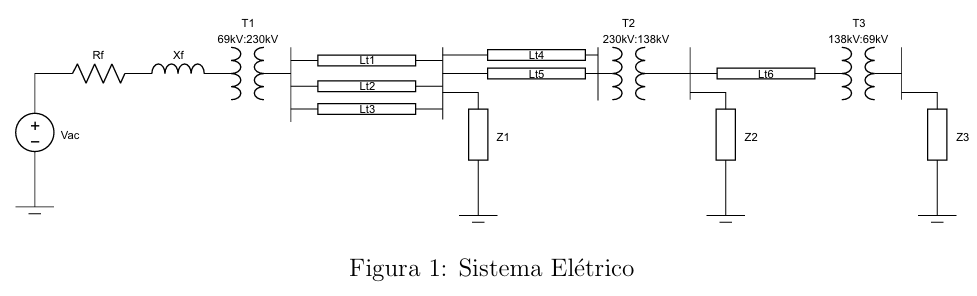

In [12]:
# Célula 1
import numpy as np
import matplotlib.pyplot as plt
import cmath

# Constantes do Sistema
f = 60
omega = 2 * np.pi * f
V_gerador = 69e3  # 69 kV RMS

## Seção 2: Parâmetros do Sistema
Definição dos parâmetros das linhas de transmissão, transformadores e cargas do sistema elétrico.

### Linhas de Transmissão

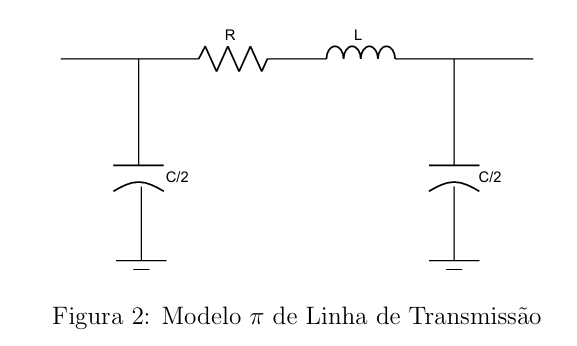

- **$R_{km}$**: Resistência por quilômetro (Ω/km)  
- **$L_{km}$**: Indutância por quilômetro (H/km)  
- **$C_{km}$**: Capacitância por quilômetro (F/km)  
- **Comprimentos**: Dicionário com os comprimentos das linhas em quilômetros.

### Transformadores

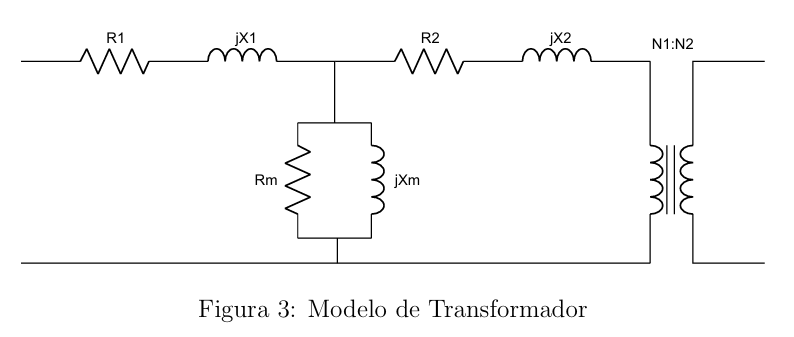

- **R1, X1, R2, X2**: Resistência e reatância do lado primário (Ω).  
- **Rm, Xm**: Resistência e reatância de magnetização (Ω).  
- **a**: Relação de transformação.

### Cargas
- **R**: Resistência da carga (Ω).  
- **L**: Indutância da carga (H).  

In [22]:
# Célula 2
# Linhas de Transmissão
R_km, L_km, C_km = 0.172, 2.18e-3, 0.0136e-6
comprimentos = {'LT1':80, 'LT2':80, 'LT3':80, 'LT4':100, 'LT5':100, 'LT6':90}

# Transformadores
trafo_params = {
    'T1': {'R1': 7.6e-3, 'X1': 3.8e-3, 'R2': 33.9e-3, 'X2': 0.85e-3, 'Rm': 4320, 'Xm': 5050},
    'T2': {'R1': 7.6e-3, 'X1': 3.8e-3, 'R2': 33.9e-3, 'X2': 0.85e-3, 'Rm': 432000, 'Xm': 505000},
    'T3': {'R1': 7.6e-3, 'X1': 3.8e-3, 'R2': 33.9e-3, 'X2': 0.85e-3, 'Rm': 402000, 'Xm': 607000} 
}

# Cargas
cargas = {
    'Z1': {'R':790, 'L':4.1},
    'Z2': {'R':137.55, 'L':0.75},
    'Z3': {'R':62.0, 'L':0.34}
}

## Seção 3: Funções para Matrizes ABCD
Implementação das funções para calcular as matrizes de transferência (ABCD) dos componentes do sistema:

1. **Linhas de Transmissão**: Modelo π.

$$
T_{LT} =
\begin{bmatrix}
1 + \frac{ZY}{2} & Z \\
Y \left( 1 + \frac{ZY}{4} \right) & 1 + \frac{ZY}{2}
\end{bmatrix}
$$
Onde:
- $Z = R + L = R + j\omega L$;
- $Y = \dfrac{1}{C} = \dfrac{j\omega C}{2}$


2. **Transformadores**: Modelo T. 

$$
T_{T} =
\begin{bmatrix}
1+YZ_{1} & Z_{1} + Z_{2} + YZ_{1}Z_{2} \\
Y & 1 + YZ_{2}
\end{bmatrix}
$$
Onde:
- $Z_{1} = R_{1} + j\omega X_{1}$;
- $Z_{2} = R_{2} + j\omega X_{2}$;
- $Y = \dfrac{1}{\omega Z_{m}}$;
- $Z_{m} = R_{m}//jX_{m} = \frac{R_{m} jX_{m}}{R_{m} + jX_{m}} $

3. **Cargas**: Modelo de impedância série. 
$$
T_{carga} =
\begin{bmatrix}
1 & Z \\
0 & 1
\end{bmatrix}
$$
Onde:
- $Z = R + j\omega L$;

4. **Associação em Cascata**: Multiplicação de matrizes ABCD para componentes em série. 

Na análise de sistemas elétricos por quadripolos, a associação em cascata é usada quando os componentes do sistema (como linhas de transmissão, transformadores e cargas) estão conectados em série. Nesse caso, a matriz de transferência ABCD do sistema completo é obtida pelo **produto das matrizes ABCD** de cada componente, na ordem em que eles estão dispostos no circuito. 

* Para dois componentes em cascata com matrizes ABCD 𝑇1 e T2:

$$
T_1 = \begin{bmatrix}
A_1 & B_1 \\
C_1 & D_1
\end{bmatrix},
\qquad
T_2 = \begin{bmatrix}
A_2 & B_2 \\
C_2 & D_2
\end{bmatrix}
$$

* A matriz ABCD do sistema combinado é:

$$
T_{sistema} = T_{1}\cdot T_{2} = 
\begin{bmatrix}
A_1 & B_1 \\
C_1 & D_1
\end{bmatrix}
\cdot
\begin{bmatrix}
A_2 & B_2 \\
C_2 & D_2
\end{bmatrix}
$$

* O produto matricial resulta em:

$$

T_{sistema} = \begin{bmatrix}
A_1A_2 + B_1C_2 & A_1B_2 + B_1D_2 \\
C_1A_2 + D_1C_2 & C_1B_2 + D_1D_2
\end{bmatrix}

$$

5. **Associação em Paralelo**: Combinação de matrizes ABCD para componentes em paralelo.

In [14]:
# Célula 3
def matriz_linha(R_km, L_km, C_km, comprimento):
    R = R_km * comprimento
    L = L_km * comprimento
    C = C_km * comprimento
    Z = R + 1j*omega*L
    Y = 1j*omega*C/2
    return np.array([[1 + (Z*Y)/2, Z], [Y*(1 + (Z*Y))/4, 1 + (Z*Y)/2]], dtype=complex)

def matriz_transformador(R1, X1, R2, X2, Rm, Xm, a=1):
    Z1 = R1 + 1j * X1  # Impedância do lado primário
    Z2 = R2 + 1j * X2  # Impedância do lado secundário
    Zm = (Rm * 1j * Xm) / (Rm + 1j * Xm)  # Impedância de magnetização (paralelo)
    
    return np.array([
        [a + Z1 / Zm, Z1 * a**2 + Z2],
        [1 / Zm, 1 / a]
    ], dtype=complex)

def matriz_carga(R, L):
    Z = R + 1j*omega*L
    return np.array([[1, Z], [0, 1]], dtype=complex)

def cascata(*matrizes):
    T = np.eye(2, dtype=complex)
    for M in matrizes: T = np.dot(T, M)
    return T

def paralelo(M1, M2):
    A = (M1[0,0]*M2[0,1] + M2[0,0]*M1[0,1])/(M1[0,1] + M2[0,1])
    B = (M1[0,1]*M2[0,1])/(M1[0,1] + M2[0,1])
    C = M1[1,0] + M2[1,0] + ((M1[0,0]-M2[0,0])*(M2[1,1]-M1[1,1]))/(M1[0,1] + M2[0,1])
    D = (M2[0,1]*M1[1,1] + M1[0,1]*M2[1,1])/(M1[0,1] + M2[0,1])
    return np.array([[A, B], [C, D]], dtype=complex)

## Seção 4: Modelagem do Sistema
Criação das matrizes individuais para cada componente do sistema (linhas, transformadores e cargas) e associação em cascata para formar a matriz total do sistema.

In [15]:
# Célula 4
# Criar matrizes
linhas = {nome: matriz_linha(R_km, L_km, C_km, comp) for nome, comp in comprimentos.items()}
transformadores = {
    'T1': matriz_transformador(**trafo_params['T1'], a=230/69),
    'T2': matriz_transformador(**trafo_params['T2'], a=138/230),
    'T3': matriz_transformador(**trafo_params['T3'], a=69/138)
}
cargas_mtx = {nome: matriz_carga(p['R'], p['L']) for nome, p in cargas.items()}

# Exemplo de associação
sistema = [linhas['LT1'], transformadores['T1'], cargas_mtx['Z3']]
T_sistema = cascata(*sistema)

## Seção 5: Cálculo de Tensão e Corrente na Carga Z3
Cálculo da tensão e da corrente na carga Z3 utilizando a matriz total do sistema (ABCD).  
Os resultados incluem:
- **Tensão RMS na carga (V_z3)**  
- **Corrente RMS na carga (I_z3)**  
- **Ângulo de fase** entre tensão e corrente.

In [16]:
# Célula 5
def calcular_saida(T, V_entrada):
    A, B, C, D = T[0,0], T[0,1], T[1,0], T[1,1]
    Z3 = cargas['Z3']['R'] + 1j*omega*cargas['Z3']['L']
    V_saida = V_entrada / (A + B/Z3)
    return V_saida, V_saida/Z3

V_z3, I_z3 = calcular_saida(T_sistema, V_gerador)
print(f"Tensão Z3: {abs(V_z3)/1e3:.2f} kV ∠ {np.angle(V_z3, deg=True):.2f}°")
print(f"Corrente Z3: {abs(I_z3):.2f} A ∠ {np.angle(I_z3, deg=True):.2f}°")

Tensão Z3: 10.16 kV ∠ -0.57°
Corrente Z3: 71.34 A ∠ -64.76°


## Seção 6: Diagrama Fasorial
Representação gráfica dos fasores de tensão e corrente na carga Z3.  
Dois gráficos são gerados:
1. **Fasor da Tensão** (em vermelho).  
2. **Fasor da Corrente** (em azul).  

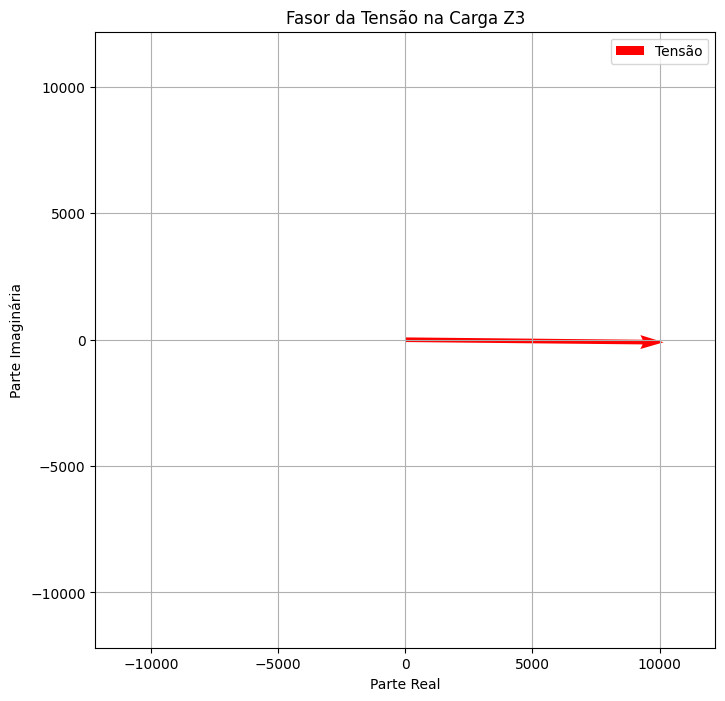

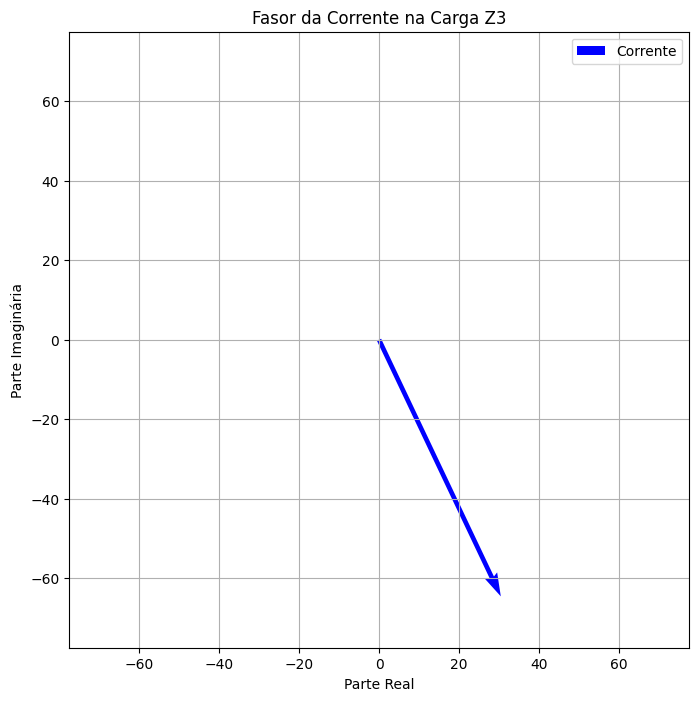

In [17]:

# Célula 6 para dois gráficos separados
def plot_fasores_separados(V, I, title_tensao, title_corrente):
    # Gráfico para a tensão
    plt.figure(figsize=(8, 8))
    plt.quiver(0, 0, np.real(V), np.imag(V), angles='xy', scale_units='xy', scale=1, color='r', label='Tensão')
    limite_tensao = 1.2 * max(abs(np.real(V)), abs(np.imag(V)))
    if limite_tensao == 0:  # Evitar limites nulos
        limite_tensao = 1
    plt.xlim(-limite_tensao, limite_tensao)
    plt.ylim(-limite_tensao, limite_tensao)
    plt.grid()
    plt.xlabel('Parte Real')
    plt.ylabel('Parte Imaginária')
    plt.legend()
    plt.title(title_tensao)
    plt.show()

    # Gráfico para a corrente
    plt.figure(figsize=(8, 8))
    plt.quiver(0, 0, np.real(I), np.imag(I), angles='xy', scale_units='xy', scale=1, color='b', label='Corrente')
    limite_corrente = 1.2 * max(abs(np.real(I)), abs(np.imag(I)))
    if limite_corrente == 0:  # Evitar limites nulos
        limite_corrente = 1
    plt.xlim(-limite_corrente, limite_corrente)
    plt.ylim(-limite_corrente, limite_corrente)
    plt.grid()
    plt.xlabel('Parte Real')
    plt.ylabel('Parte Imaginária')
    plt.legend()
    plt.title(title_corrente)
    plt.show()

# Chamada da função para dois gráficos
plot_fasores_separados(V_z3, I_z3, "Fasor da Tensão na Carga Z3", "Fasor da Corrente na Carga Z3")

## Seção 7: Cálculo de Potências
Cálculo das potências na carga Z3:
- **Potência Ativa (P)**: Energia útil consumida pela carga (kW).  
- **Potência Reativa (Q)**: Energia armazenada e devolvida ao sistema (kVAR).  

In [18]:
# Célula 7
def potencia_aparente(V, I):
    S = V * np.conj(I)
    return S.real, S.imag

P_z3, Q_z3 = potencia_aparente(V_z3, I_z3)
print(f"Potência Ativa (Z3): {P_z3/1e3:.2f} kW")
print(f"Potência Reativa (Z3): {Q_z3/1e3:.2f} kVAR")

Potência Ativa (Z3): 315.58 kW
Potência Reativa (Z3): 652.43 kVAR


## Seção 8: Ajuste de TAP
Cálculo do TAP ajustado para o transformador T1, de forma a garantir que a tensão de saída esteja dentro do valor desejado.

In [19]:
# Célula 8
def ajustar_tap(V_alvo, V_fonte):
    return V_fonte / V_alvo

NT1_ajustado = ajustar_tap(69e3, V_gerador)
transformadores['T1'] = matriz_transformador(**trafo_params['T1'], a=NT1_ajustado)
print(f"TAP ajustado para T1: {NT1_ajustado:.3f}")

TAP ajustado para T1: 1.000


## Seção 9: Compensação Reativa
Cálculo do capacitor necessário para compensar a potência reativa da carga Z3 e melhorar o fator de potência do sistema.

In [20]:
# Célula 9
def capacitor_derivacao(Q_necessario, V, f=60):
    Xc = V**2 / Q_necessario
    return 1 / (2 * np.pi * f * abs(Xc))

C_z3 = capacitor_derivacao(-100e3, abs(V_z3))
print(f"Capacitor para Z3: {C_z3:.6f} F")

Capacitor para Z3: 0.000003 F


## Seção 10: Resultados Finais
Resumo dos resultados obtidos:
- **Tensão na carga Z3** (kV).  
- **Corrente na carga Z3** (A).  
- **Perdas ativas no sistema** (kW).  
- **Fator de potência da carga Z3**.  

In [21]:
# Célula 10
# Calcular corrente no gerador
I_gerador = V_gerador / T_sistema[0, 1]

# Calcular potência ativa no gerador
P_gerador = abs(V_gerador) * abs(I_gerador) * np.cos(np.angle(V_gerador) - np.angle(I_gerador))

print("\n--- Resultados Finais ---")
print(f"Tensão Z3: {abs(V_z3)/1e3:.2f} kV")
print(f"Perdas Ativas: {(P_gerador - P_z3)/1e3:.2f} kW")
print(f"Fator de Potência Z3: {np.cos(np.angle(V_z3) - np.angle(I_z3)):.2f}")


--- Resultados Finais ---
Tensão Z3: 10.16 kV
Perdas Ativas: 3758.18 kW
Fator de Potência Z3: 0.44
